###  Desafio 🚀
---

Nessa 2° etapa do desafio, será realizada a leitura do arquivo "csv_limpo.csv" que limpamos na Etapa 1 e, logo após, realizado o processamento de dados para gerar as respostas das perguntas Q1, Q2, Q3, Q4 e Q5.

Análise inicial
__________________________________________________________________________________________________
Inicialmente importei as bibliotecas Pandas, que será usada para carregar, manipular e tratar os dados, e Matplotlib, que será usada para criar gráficos. Em seguida fiz a leitura do CSV limpo gerado na etapa anterior, também visualizei melhor as primeiras linhas para conferir os dados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('csv_limpo.csv')

df.head()

,Rank,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Shows,Average gross,Start year,End year
0,1,780000000.0,780000000.0,Taylor Swift,The Eras Tour,56,13928571.0,2023,2024
1,2,579800000.0,579800000.0,Beyoncé,Renaissance World Tour,56,10353571.0,2023,2023
2,3,411000000.0,560622615.0,Madonna,Sticky and Sweet Tour,85,4835294.0,2008,2009
3,4,397300000.0,454751555.0,Pink,Beautiful Trauma World Tour,156,2546795.0,2018,2019
4,5,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,53,6522173.0,2018,2018


- Q1 - Qual é a artista que mais aparece nessa lista e possui a maior média de seu faturamento bruto (Actual gross)?
__________________________________________________________________________________________________

Comecei usando value_counts() para contar quantas vezes cada artista aparece na coluna 'Artist'. Com idxmax(), identifiquei o nome da artista mais recorrente, e com max(), a quantidade de aparições. Em seguida, filtrei o DataFrame para selecionar apenas as turnês dessa artista e calculei a média do faturamento bruto com mean() na coluna 'Actual gross'. Por fim, usei print() para exibir a resposta formatada com o nome da artista, a quantidade de turnês e sua média de faturamento.

In [3]:
aparecimentos = df['Artist'].value_counts()
artista_destaque = aparecimentos.idxmax()
quantidade = aparecimentos.max()
df_artista = df[df['Artist'] == artista_destaque]
media_faturamento = df_artista['Actual gross'].mean()

resposta_q1 = (
    "Q1:\n\n"
    f"A artista que mais aparece na lista é {artista_destaque}, com um total de {quantidade} turnês.\n"
    f"Essas turnês faturaram em média ${media_faturamento:,.2f} cada uma.\n\n"
)

print(resposta_q1)

Q1:

A artista que mais aparece na lista é Taylor Swift, com um total de 4 turnês.
Essas turnês faturaram em média $381,518,786.50 cada uma.




- Q2 - Das turnês que aconteceram dentro de um ano, qual a turnê com a maior média de faturamento bruto (Average gross)?
__________________________________________________________________________________________________
Comecei filtrando o DataFrame para selecionar apenas as turnês que começaram e terminaram no mesmo ano, comparando as colunas 'Start year' e 'End year'. Em seguida, ordenei esse subconjunto pela coluna 'Average gross' em ordem decrescente, com sort_values(), para encontrar a turnê de maior média de faturamento. Usei iloc[0] para acessar a primeira linha (a turnê mais lucrativa entre as anuais). Por fim, exibi o nome da turnê, cantora e o valor médio faturado com a resposta formatada.

In [7]:
df_turnes_anuais = df[df['Start year'] == df['End year']]
df_maior_media_1ano = df_turnes_anuais.sort_values(by='Average gross', ascending=False)
turne_mais_lucrativa_1ano = df_maior_media_1ano.iloc[0]

resposta_q2 = (
    "Q2:\n\n"
    f"A turnê mais lucrativa, considerando apenas as que começaram e terminaram no mesmo ano, "
    f"foi '{turne_mais_lucrativa_1ano['Tour title']}' da cantora {turne_mais_lucrativa_1ano['Artist']}.\n"
    f"A média de faturamento dessa turnê foi ${turne_mais_lucrativa_1ano['Average gross']:,.2f}.\n\n"
)

print(resposta_q2)

Q2:

A turnê mais lucrativa, considerando apenas as que começaram e terminaram no mesmo ano, foi 'Renaissance World Tour' da cantora Beyoncé.
A média de faturamento dessa turnê foi $10,353,571.00.




- Q3 - Quais são as 3 turnês que possuem o show (unitário) mais lucrativo? Cite também o nome de cada artista e o valor por show. Utilize a coluna "Adjusted gross (in 2022 dollars)". Caso necessário, crie uma coluna nova para essa conta.
__________________________________________________________________________________________________
Criei uma nova coluna chamada 'Lucro por show', dividindo o valor do faturamento ajustado (Adjusted gross) pelo número de shows, usando uma operação vetorizada do pandas. Depois, ordenei o DataFrame com sort_values() para encontrar as maiores médias de lucro por show, selecionando apenas as 3 primeiras com .head(3). Por fim, usei um loop for com iterrows() para percorrer essas 3 turnês e exibir o nome da turnê, artista e o valor unitário de lucro formatado.



In [9]:
df['Lucro por show'] = df['Adjusted gross (in 2022 dollars)'] / df['Shows']
top3 = df.sort_values(by='Lucro por show', ascending=False).head(3)

resposta_q3 = "Q3:\n\n"
resposta_q3 += "Essas são as 3 turnês com maior faturamento por show individual:\n"
for _, row in top3.iterrows():
    resposta_q3 += f"- '{row['Tour title']}', da artista {row['Artist']}, arrecadou em média ${row['Lucro por show']:,.2f} por apresentação.\n"
resposta_q3 += "\n"

print(resposta_q3)

Q3:

Essas são as 3 turnês com maior faturamento por show individual:
- 'The Eras Tour', da artista Taylor Swift, arrecadou em média $13,928,571.43 por apresentação.
- 'Renaissance World Tour', da artista Beyoncé, arrecadou em média $10,353,571.43 por apresentação.
- 'Reputation Stadium Tour', da artista Taylor Swift, arrecadou em média $7,600,846.21 por apresentação.




- Q4 - Para a artista que mais aparece nessa lista e que tenha o maior somatório de faturamento bruto, crie um gráfico de linhas que mostra o faturamento por ano da turnê (use a coluna Start Year). Apenas os anos com turnês.
__________________________________________________________________________________________________
Filtrei os dados da artista que mais aparece usando value_counts().idxmax(). Em seguida, agrupei o faturamento bruto (Actual gross) por ano de início da turnê com groupby() e sum(). Usei matplotlib para criar um gráfico de linha, personalizando com título, eixos e grade. Por fim, salvei o gráfico como Q4.png com plt.savefig()

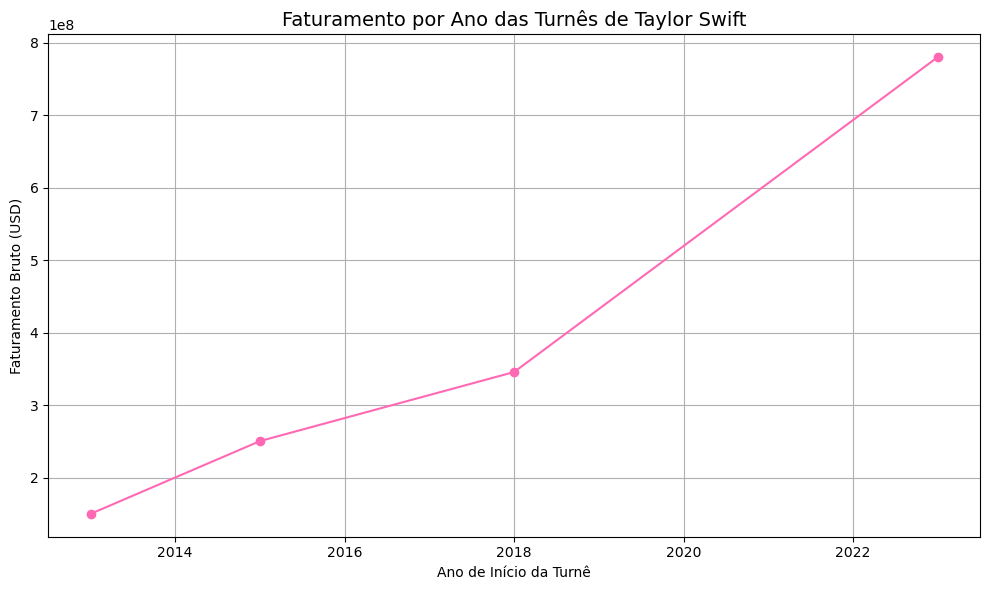

In [ ]:
artista_destaque = df['Artist'].value_counts().idxmax()
df_artista_destaque = df[df['Artist'] == artista_destaque]
faturamento_anual = df_artista_destaque.groupby('Start year')['Actual gross'].sum().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(faturamento_anual.index, faturamento_anual.values, marker='o', color='hotpink')
plt.title(f'Faturamento por Ano das Turnês de {artista_destaque}', fontsize=14)
plt.xlabel('Ano de Início da Turnê')
plt.ylabel('Faturamento Bruto (USD)')
plt.grid(True)
plt.tight_layout()
plt.savefig('Q4.png')
plt.show()

- Q5 - Faça um gráfico de colunas demonstrando as 5 artistas com mais shows na lista.
__________________________________________________________________________________________________
Agrupei os dados pelo nome do artista somando a quantidade total de shows. Em seguida, selecionei os 5 artistas com o maior número de shows usando sort_values().head(5). Depois, criei um gráfico de colunas com matplotlib, ajustei os rótulos e salvei a imagem como "Q5.png".

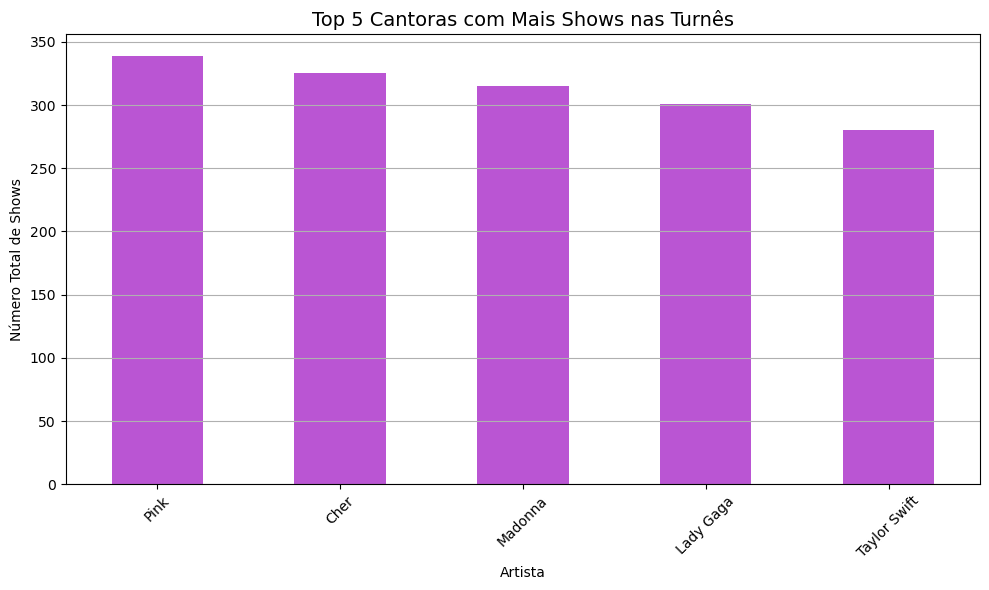

In [4]:
shows_por_cantora = df.groupby('Artist')['Shows'].sum()
top5_shows = shows_por_cantora.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top5_shows.plot(kind='bar', color='mediumorchid')
plt.title('Top 5 Cantoras com Mais Shows nas Turnês', fontsize=14)
plt.xlabel('Artista')
plt.ylabel('Número Total de Shows')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('Q5.png')
plt.show()